# Lab 7

Ali Tejani, amt3639

Caroline Yao, chy253

Allen Hwang, ah45755

## Problem 1.   
The  dataset  you  played  on  the  Kaggle  competition  was  derived  from  this  dataset https://www.kaggle.com/c/GiveMeSomeCredit/data.  As you can see, you were predicting who
will have a serious Deliquency on their loan.  If someone is a high-risk individual (i.e.  the model
predicts y= 1 they would be denied a loan).

### 1.
Identify  and  name  the  real  features  in  the  in-class  Kaggle  training dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in data
train = pd.read_csv('inputs/train_final.csv', index_col = 'id')
trainX = train.loc[:,'F1':]
trainY = train['Y']
testX = pd.read_csv('inputs/test_final.csv', index_col = 'id')

In [4]:
realData = pd.read_csv('inputs/cs-training.csv', index_col=0)

In [12]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_hist(r1):
    for col in r1:
        print col
        c = r1[col].dropna()
        c = c[~is_outlier(c)]
        print np.histogram(c)
        plt.hist(c)
        plt.show()

In [91]:
real = realData[realData.columns[1:]]
sample = train[train.columns[1:]]
real1 = real.columns
sample1 = sample.columns
for i in real1:
    print i,':'
    matchP = []
    for j in sample1:
        matchP.append(abs(np.mean(real[i])-np.mean(sample[j]))/np.mean(real[i])
                      + abs(np.std(real[i]) - np.std(sample[j]))/np.std(real[i]))
    print sample1[np.argmin(matchP)]

RevolvingUtilizationOfUnsecuredLines :
F23
age :
F26
NumberOfTime30-59DaysPastDueNotWorse :
F25
DebtRatio :
F27
MonthlyIncome :
F19
NumberOfOpenCreditLinesAndLoans :
F22
NumberOfTimes90DaysLate :
F14
NumberRealEstateLoansOrLines :
F10
NumberOfTime60-89DaysPastDueNotWorse :
F2
NumberOfDependents :
F5


We assume that the data in the class kaggle competition was sampled from this public training set. If so, the means and variances of the features should be similar. We can visually check our computed results by comparing the histograms of the features

RevolvingUtilizationOfUnsecuredLines
(array([62488, 17208, 10895,  8563,  7052,  6009,  5088,  4677,  4410,  4909], dtype=int64), array([ 0.        ,  0.09238452,  0.18476904,  0.27715356,  0.36953808,
        0.4619226 ,  0.55430712,  0.64669164,  0.73907616,  0.83146067,
        0.92384519]))


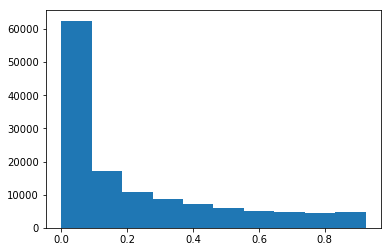

age
(array([    1,   183, 14662, 29663, 40070, 36822, 19653,  7670,  1254,    22], dtype=int64), array([   0. ,   10.9,   21.8,   32.7,   43.6,   54.5,   65.4,   76.3,
         87.2,   98.1,  109. ]))


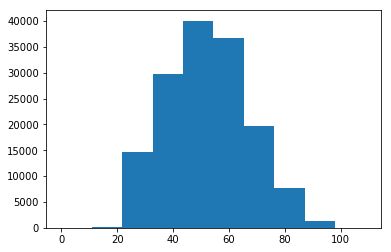

DebtRatio
(array([35432, 32649, 24836, 12507,  6008,  3016,  1771,   972,   668,   414], dtype=int64), array([ 0.        ,  0.16413478,  0.32826956,  0.49240434,  0.65653912,
        0.8206739 ,  0.98480868,  1.14894346,  1.31307824,  1.47721302,
        1.6413478 ]))


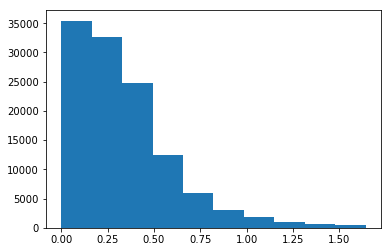

MonthlyIncome
(array([ 9146, 21828, 27294, 20177, 15218,  9848,  6381,  3423,  2171,  1380], dtype=int64), array([     0. ,   1741.6,   3483.2,   5224.8,   6966.4,   8708. ,
        10449.6,  12191.2,  13932.8,  15674.4,  17416. ]))


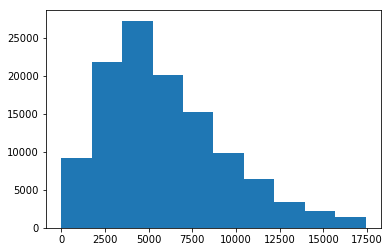

NumberOfOpenCreditLinesAndLoans
(array([12992, 20667, 26545, 37162, 17945, 12672, 11191,  4244,  2602,  2082], dtype=int64), array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
        20.7,  23. ]))


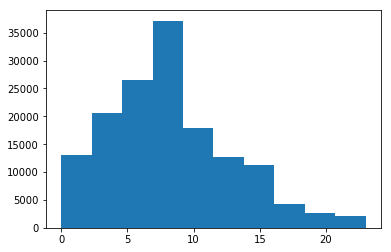

NumberRealEstateLoansOrLines
(array([56188, 52338,     0, 31522,     0,  6300,  2170,     0,   689,   320], dtype=int64), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))


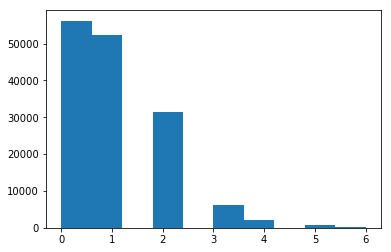

In [92]:
a = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines']
plot_hist(real[a])

F3
(array([  174,  4239, 13846, 10403,  5334,  3608,  2879,  3015,  4179,  1825], dtype=int64), array([-0.37275839, -0.21561191, -0.05846544,  0.09868103,  0.2558275 ,
        0.41297397,  0.57012045,  0.72726692,  0.88441339,  1.04155986,
        1.19870634]))


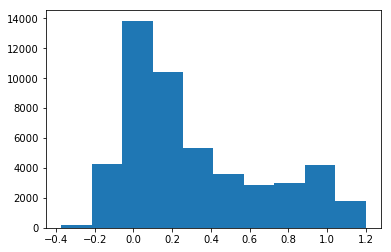

F6
(array([19124,  6900,     0,  3559,     0,  2399,  1640,     0,  1317,  1055], dtype=int64), array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]))


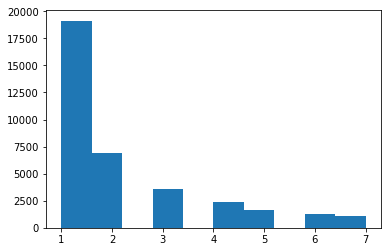

F10
(array([18736, 17408,     0, 10498,     0,  2155,   718,     0,   223,   100], dtype=int64), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))


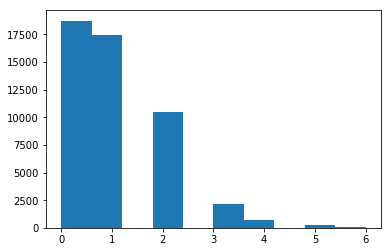

F11
(array([  270,  1045,  3409,  7212, 11000, 11594,  8691,  4481,  1696,   501], dtype=int64), array([ 25.,  28.,  31.,  34.,  37.,  40.,  43.,  46.,  49.,  52.,  55.]))


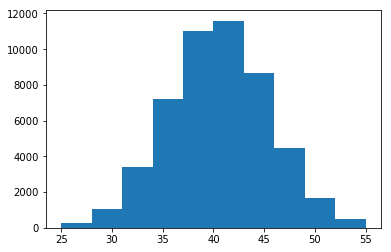

F18
(array([ 2950,  6748,  8634, 11023,  9193,  6633,  3383,  1210,   212,    12], dtype=int64), array([  98. ,  106.6,  115.2,  123.8,  132.4,  141. ,  149.6,  158.2,
        166.8,  175.4,  184. ]))


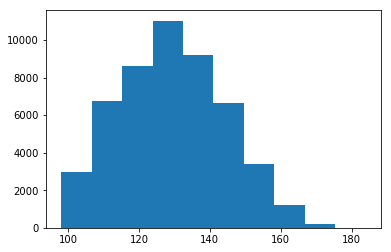

F19
(array([3047, 7267, 9048, 6831, 5002, 3266, 2181, 1196,  731,  441], dtype=int64), array([     0. ,   1726.4,   3452.8,   5179.2,   6905.6,   8632. ,
        10358.4,  12084.8,  13811.2,  15537.6,  17264. ]))


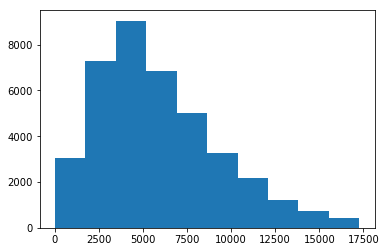

F22
(array([ 4248,  6901,  8959, 12341,  5938,  4253,  3809,  1433,   833,   690], dtype=int64), array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
        20.7,  23. ]))


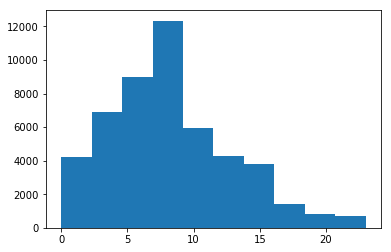

F23
(array([20784,  5780,  3700,  2870,  2293,  2077,  1707,  1492,  1470,  1612], dtype=int64), array([ 0.        ,  0.09258938,  0.18517877,  0.27776815,  0.37035754,
        0.46294692,  0.55553631,  0.64812569,  0.74071508,  0.83330446,
        0.92589385]))


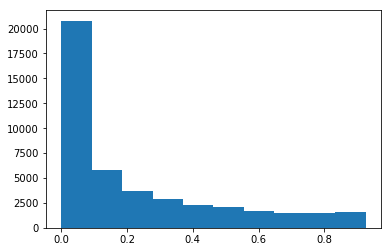

F26
(array([ 2950,  6748,  8634, 11023,  9193,  6633,  3383,  1210,   212,    12], dtype=int64), array([  21. ,   29.6,   38.2,   46.8,   55.4,   64. ,   72.6,   81.2,
         89.8,   98.4,  107. ]))


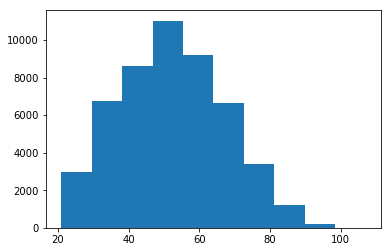

F27
(array([11738, 10852,  8378,  4149,  1987,   987,   648,   331,   231,   137], dtype=int64), array([ 0.        ,  0.16399345,  0.32798691,  0.49198036,  0.65597381,
        0.81996727,  0.98396072,  1.14795417,  1.31194763,  1.47594108,
        1.63993453]))


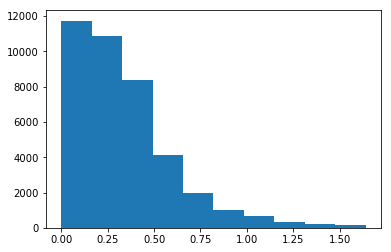

In [93]:
b = ['F3','F6','F10','F11','F18','F19','F22','F23','F26','F27']
plot_hist(sample[b])

### 2. Model interpretability
What is the effect of MonthlyIncome to the prediction?  Quantify as much as you can how 1000, 2000 or 3000 extra per month affect the probablity of deliquency.  Do this by fitting a simple model on the dataset and using your best model.

In [127]:
from sklearn.linear_model import ElasticNetCV
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import cross_val_score

In [128]:
realX = realData[realData.columns[1:]]
realY = realData[realData.columns[0]]

In [140]:
xgb = XGBClassifier()
scores = cross_val_score(estimator, realX, realY, cv=5, scoring = 'roc_auc')
print("Avg Score: {}% ({})".format(scores.mean()*100, scores.std()*100))

Avg Score: 86.4295750602% (0.339239506072)


In [162]:
alteredX = realX.copy()

xgb.fit(realX,realY)

real_pred = xgb.predict_proba(realX)[:,1]
for i in range(1000,4000,1000):
    alteredX['MonthlyIncome'] = realX['MonthlyIncome'] + i
    preds = xgb.predict_proba(alteredX)[:,1]
    print 'Percent decrease in avg delinquincy rate with ${} in monthly income: {}%'.format(i,
        -100*(preds.mean()-real_pred.mean())/real_pred.mean())

Percent decrease in avg delinquincy rate with $1000 in monthly income: 1.0386043689%
Percent decrease in avg delinquincy rate with $2000 in monthly income: 2.86832205973%
Percent decrease in avg delinquincy rate with $3000 in monthly income: 4.59215681817%


With no other changes, increasing the monthly income of a sample will decrease the model predicting delinquincy. However, this does not account for how other features may change as a result of the change in income.

### 3. 
What is the most important variable in predicting deliquency? What is the most important pair of variables? Make a data science argument supported by data.

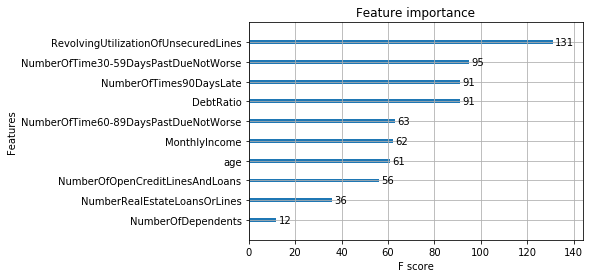

In [163]:
xgboost.plot_importance(xgb)
# xgb.feature_importances_

In [198]:
from sklearn.feature_selection import SelectKBest,chi2
realX = realX.fillna(realX.mean())
for i in range(1,3):
    b = SelectKBest(chi2,i)
    b.fit(realX,realY)
    print 'best {} features - chi score: {}'.format(i,realX.columns.get_values()[np.argsort(b.scores_)[-i:]])
    print 'best {} features - roc_auc xgboost: {}'.format(i,realX.columns.get_values()[np.argsort(xgb.feature_importances_)[-i:]])

best 1 features - chi score: ['MonthlyIncome']
best 1 features - roc_auc xgboost: ['RevolvingUtilizationOfUnsecuredLines']
best 2 features - chi score: ['NumberOfTimes90DaysLate' 'MonthlyIncome']
best 2 features - roc_auc xgboost: ['NumberOfTime30-59DaysPastDueNotWorse'
 'RevolvingUtilizationOfUnsecuredLines']


Depending on the scoring function and the model, the best features are different, as listed above. According to the chi scorer, the best pair of features are MonthlyIncome and NumberOfTimes90DaysLate and the best single feature is MonthlyIncome

### 4.
The  Age  Discrimination  in  Employment  Act  (ADEA)  forbids  age  discrimination  against people who are age 40 or older.  Look at the best models you used in your Kaggle competion.  Were they discriminating against older people? Make the best argument you can.

In [199]:
X = pd.concat([trainX,testX])
X1 = X[[a for a in X.columns if a != 'F5' and a != 'F19']]
Y1 = X['F5'][X['F5'].notnull()]
Y2 = X['F19'][X['F19'].notnull()]
f5train = X1[X['F5'].notnull()]
f19train = X1[X['F19'].notnull()]
f5test = X1[X['F5'].isnull()]
f19test = X1[X['F19'].isnull()]
enet = ElasticNetCV(alphas=[0.1,1,5,10],l1_ratio=[0.01,0.1,0.3,0.5,0.7,0.9])
enet.fit(f5train,Y1)
yf5 = enet.predict(f5test)
enet = ElasticNetCV(alphas=[0.1,1,5,10],l1_ratio=[0.01,0.1,0.3,0.5,0.7,0.9])
enet.fit(f19train,Y2)
yf19 = enet.predict(f19test)

C:\Users\Ali\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [200]:
Yt5 = X['F5'][X['F5'].isnull()]
df = pd.Series(yf5,index=Yt5.index)
X['F5'] = X['F5'].fillna(df)
Yt19 = X['F19'][X['F19'].isnull()]
df = pd.Series(yf19,index=Yt19.index)
X['F19'] = X['F19'].fillna(df)

In [201]:
trainX = X[:49998]
testX = X[49998:]

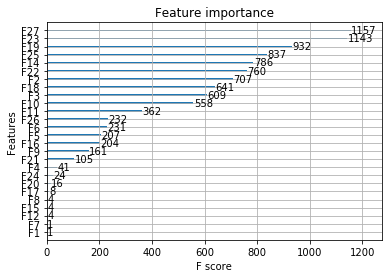

In [203]:
xgb = XGBClassifier( learning_rate=0.01, n_estimators=5000, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
 reg_alpha=.05,reg_lambda=50,
 objective= 'binary:logistic', scale_pos_weight=1)
param = xgb.get_params()
xgbtrain = xgboost.DMatrix(trainX.values,label=trainY.values)
cv = xgboost.cv(param,xgbtrain,num_boost_round=param['n_estimators'],nfold=5,metrics='auc', early_stopping_rounds=50)
xgb.set_params(n_estimators=cv.shape[0])
xgb.fit(trainX,trainY,eval_metric='auc')
xgboost.plot_importance(xgb)

Using our best submission, it seems as if age (F26) is not as important as any of other features (excluding number of dependents F5). 

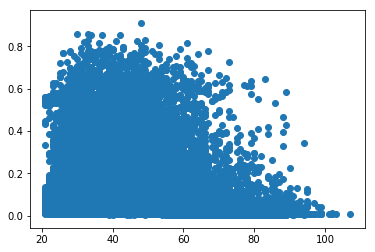

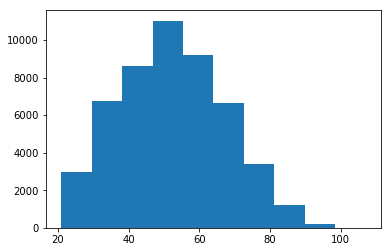

In [219]:
plt.scatter(trainX['F26'].values,xgb.predict_proba(trainX)[:,1])
plt.show()
plt.hist(trainX['F26'])
plt.show()

We can see that although most there are more predictions leaning towards delinquency in ages under 40, there are more people at low ages. The number of people over 40 are more sparse, but we see relatively the same distribution of predictions. Furthermore, it seems that people over 60 are less likely to be predicted as delinquents 

### 5.
Your manager asks if the number of dependents in the family (spouse, no of children) has an effect on loan deliquency. What does the data say? Calculate a p-value to express how confident you are.

In [253]:
realX = realData[realData.columns[1:]]
realY = realData[realData.columns[0]]

In [262]:
realData.groupby('NumberOfDependents')['SeriousDlqin2yrs'].mean()

NumberOfDependents
0.0     0.058629
1.0     0.073529
2.0     0.081139
3.0     0.088263
4.0     0.103774
5.0     0.091153
6.0     0.151899
7.0     0.098039
8.0     0.083333
9.0     0.000000
10.0    0.000000
13.0    0.000000
20.0    0.000000
Name: SeriousDlqin2yrs, dtype: float64

In [265]:
from sklearn.feature_selection import SelectKBest,chi2
realX = realX.fillna(realX.mean())
b = SelectKBest(chi2,10)
b.fit(realX,realY)
print 'p-value for effect of number of dependents on delinquency:',b.pvalues_[9]

p-value for effect of number of dependents on delinquency: 1.39805751443e-110


According to the data, the chance of delinquency increases as the number of dependents approaches 6, then decreases again. The p-value for the number of dependents is negligibly small, so we can safely reject the null hypothesis.

## Problem 2.

### a) 
Create two random variables that are uncorrelated but dependent.

### b 
Create two continuous random variables X, Y so that X and Y are strongly dependent but the best linear regression fit y = β1x+β0 has the optimal β1 = 0. Show a scatter plot ofx, ypairs.